In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
df=pd.read_excel('PCOS_data_without_infertility.xlsx')
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.304017,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.456637,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.316456,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.372576,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.222222,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [42]:
df.shape

(541, 45)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [44]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.319360,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.050810,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.707923,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.638918,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900714,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [45]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [46]:
df.dropna()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
180,181,181,1,30,70.0,150.0,31.111111,16,74,18,...,1.0,0,120,80,8,6,12.0,11.0,4.5,.
363,364,364,0,31,48.0,152.0,20.775623,17,72,18,...,1.0,0,110,80,1,3,13.0,13.0,7.0,7


In [47]:
df['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

# Coverting Object datatype into numeric 

In [48]:
df['II    beta-HCG(mIU/mL)']=pd.to_numeric(df['II    beta-HCG(mIU/mL)'] ,errors ='coerce')
df['AMH(ng/mL)']=pd.to_numeric(df['AMH(ng/mL)'],errors='coerce')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# Droping the 'Unnamed: 44' column which is undefined 

In [50]:
df.drop('Unnamed: 44',axis=1,inplace =True)
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [51]:
df.corr()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.081934,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.081934,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.200176,0.036433,0.091821,0.036928,...,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.018918,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.902205,0.072682,0.019983,0.043614,...,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006224,0.040825,-0.074339,-0.029459,...,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.081934,-0.081934,0.200176,0.018918,0.902205,-0.006224,1.000000,0.060230,0.050717,0.062258,...,0.045502,0.160555,-0.078554,0.067957,0.137606,0.144146,0.105277,-0.010298,-0.112197,0.010682
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.060230,1.000000,0.047572,-0.023766,...,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050717,0.047572,1.000000,0.303804,...,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.062258,-0.023766,0.303804,1.000000,...,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


In [52]:
correlation_with_target=df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
correlation_with_target

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.200176
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

# Trimming column names where extra spaces are present

In [53]:
df = df.rename(columns=lambda x: x.strip())

In [54]:
df = df.drop(['Sl. No'], axis = 1) #dropping not useful axis
df = df.drop(['Patient File No.'], axis = 1)

In [55]:
#column names with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [56]:
#filling missing values with their median
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) 
    
df.columns[df.isna().any()].tolist() #no more missing values left

[]

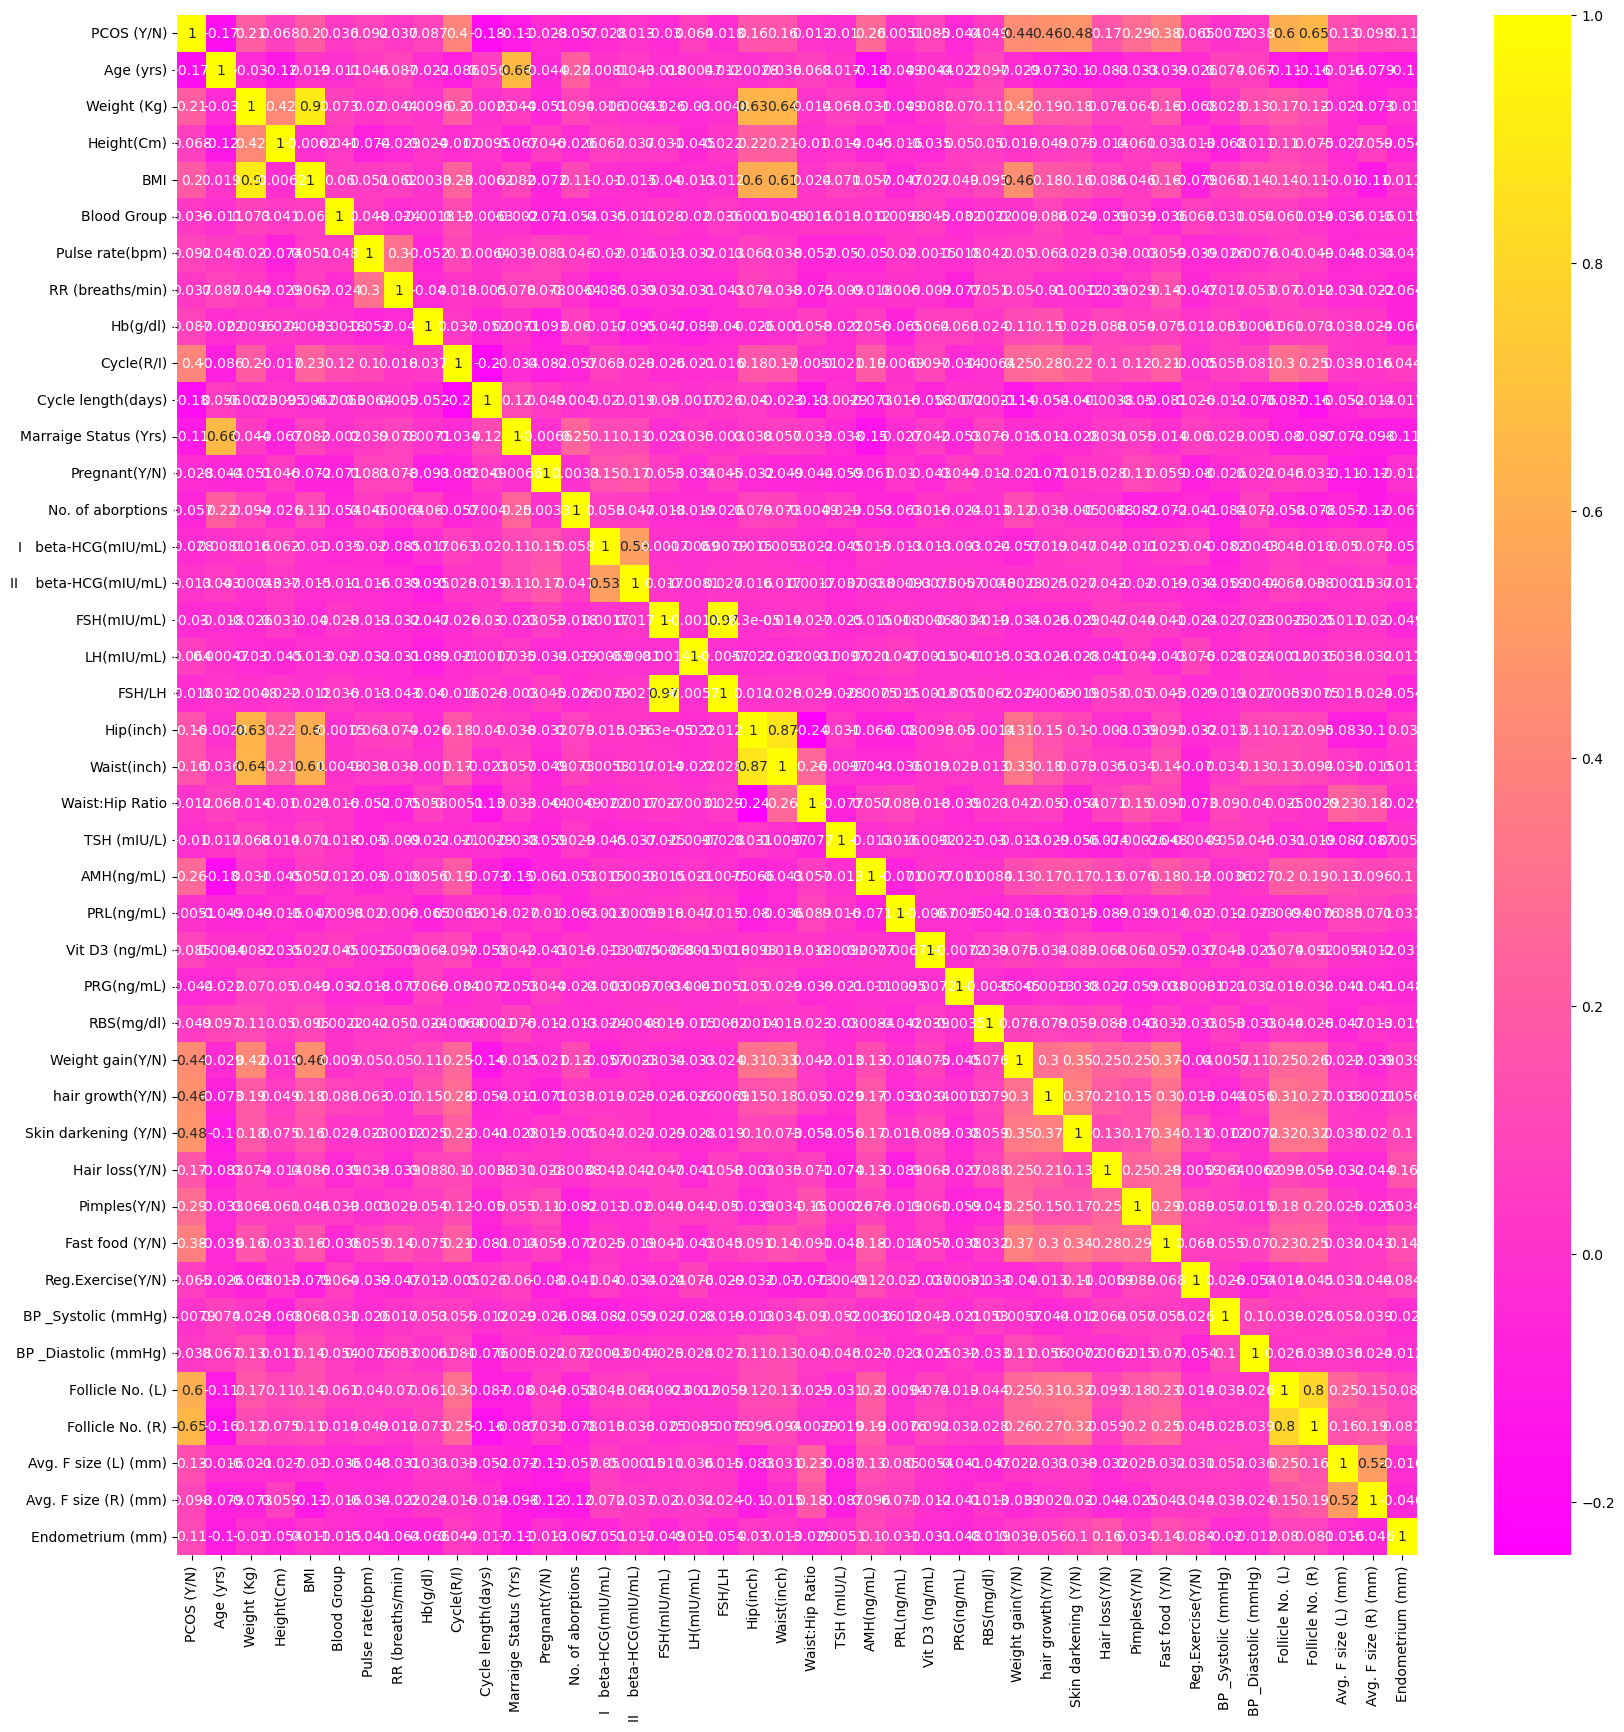

In [57]:
#Plotting correlation heatmap
plt.figure(figsize=(20, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="spring", annot=True)
  
# displaying heatmap
plt.show()

In [58]:
correlation_with_target = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.200176
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
Age (yrs)                 0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.113056
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
No. of aborptions         0.057158
RBS(mg/dl)          

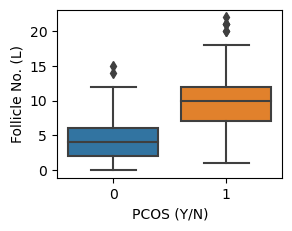

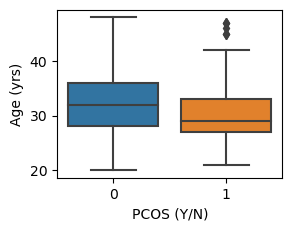

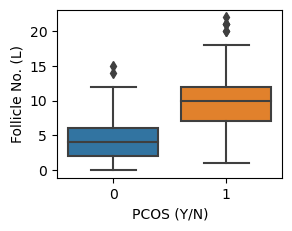

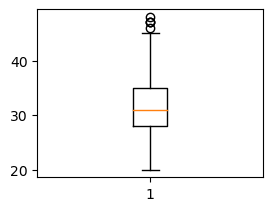

In [59]:
plt.subplot(2,2,1)
sns.boxplot(y=df['Follicle No. (L)'],x="PCOS (Y/N)", data=df)
plt.show()

plt.subplot(2,2,2)
sns.boxplot(y=df['Age (yrs)'], x="PCOS (Y/N)", data=df)
plt.show()


plt.subplot(2,2,3)
sns.boxplot(y=df['Follicle No. (L)'],x="PCOS (Y/N)", data=df)
plt.show()

plt.subplot(2,2,4)
plt.boxplot(df['Age (yrs)'], data=df)
plt.show()

In [60]:
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df['Age Group'] = pd.cut(df['Age (yrs)'],bins = age_groups,labels = age_labels)
df['Age Group']

0      26-35
1      36-45
2      26-35
3      36-45
4      18-25
       ...  
536    26-35
537    26-35
538    36-45
539    26-35
540    18-25
Name: Age Group, Length: 541, dtype: category
Categories (5, object): ['<18' < '18-25' < '26-35' < '36-45' < '45+']

In [61]:
age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)
age_group_counts

PCOS (Y/N),0,1
Age Group,,
<18,0,0
18-25,33,35
26-35,234,117
36-45,95,22
45+,2,3


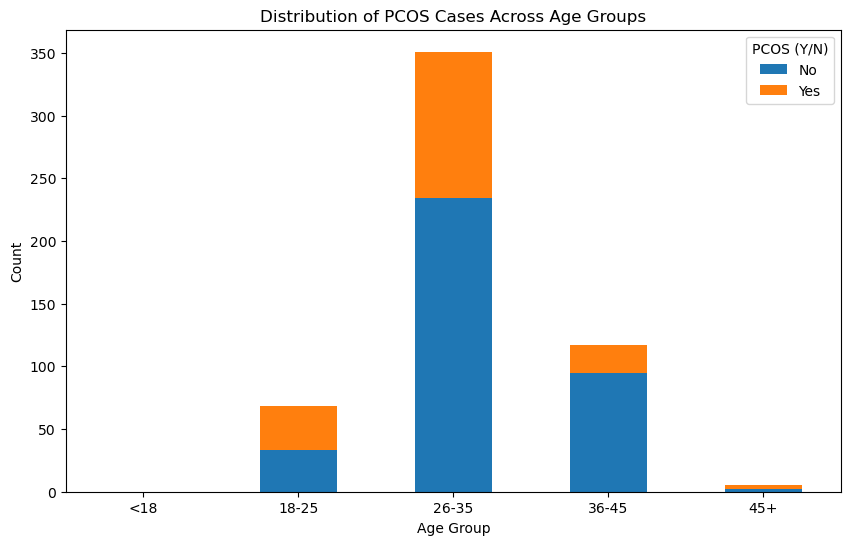

In [62]:
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

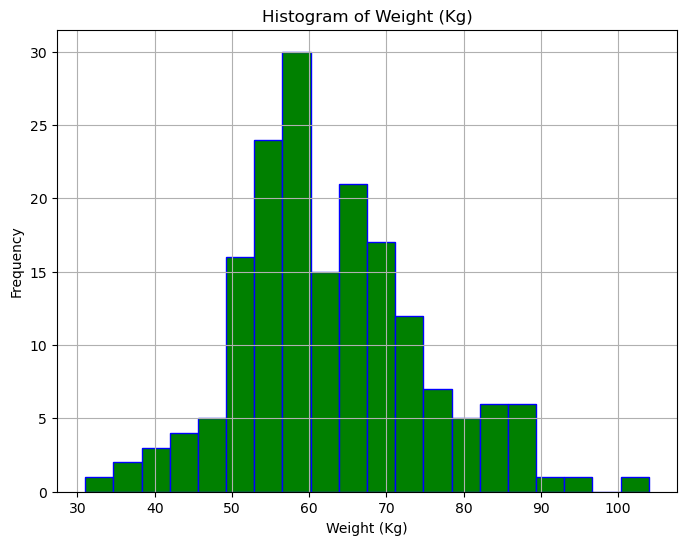

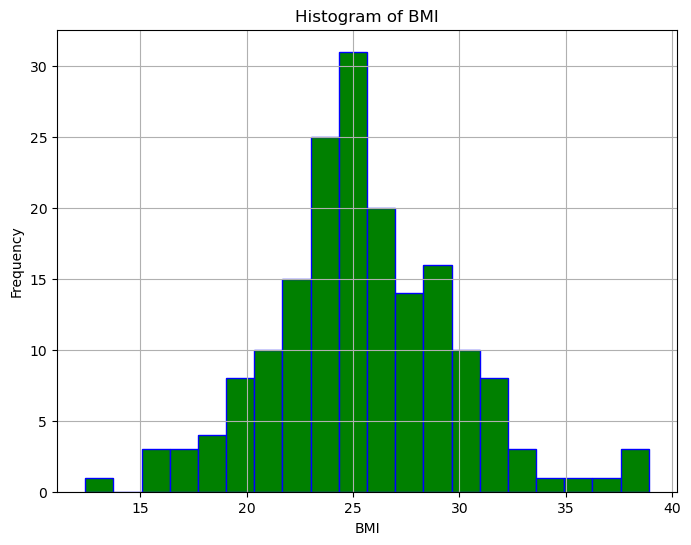

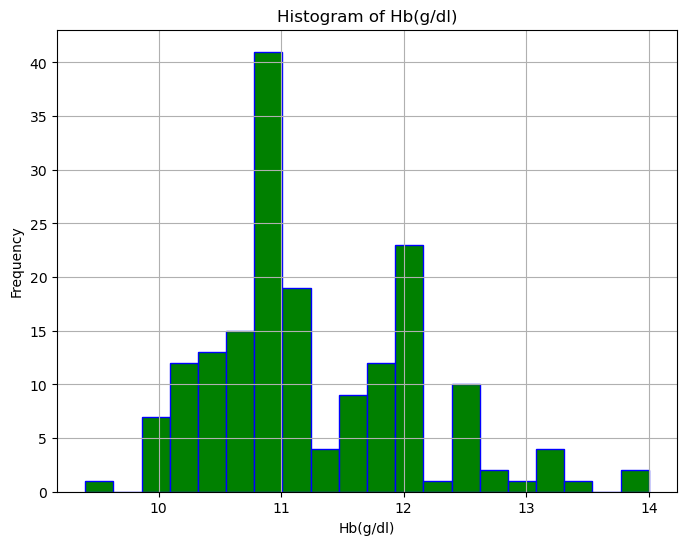

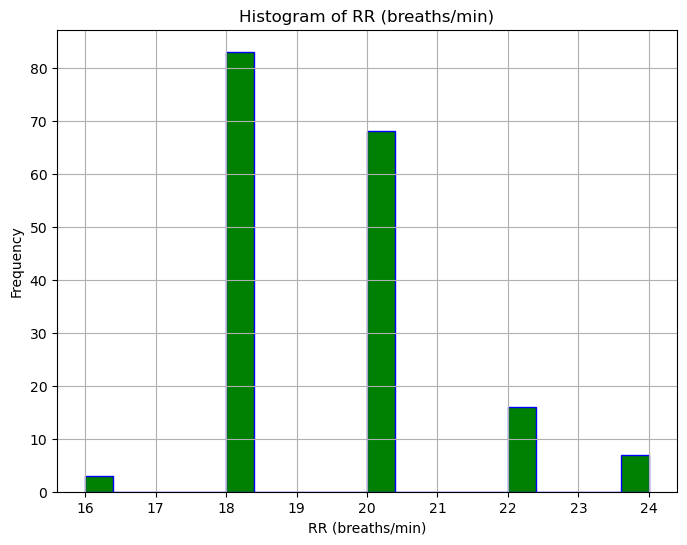

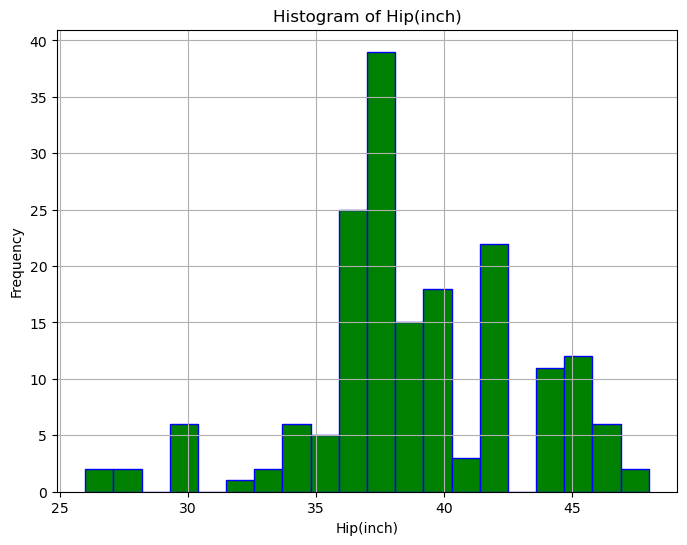

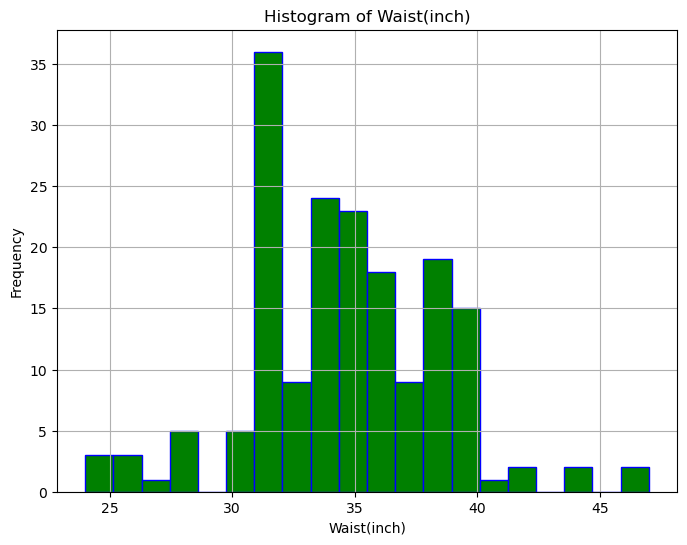

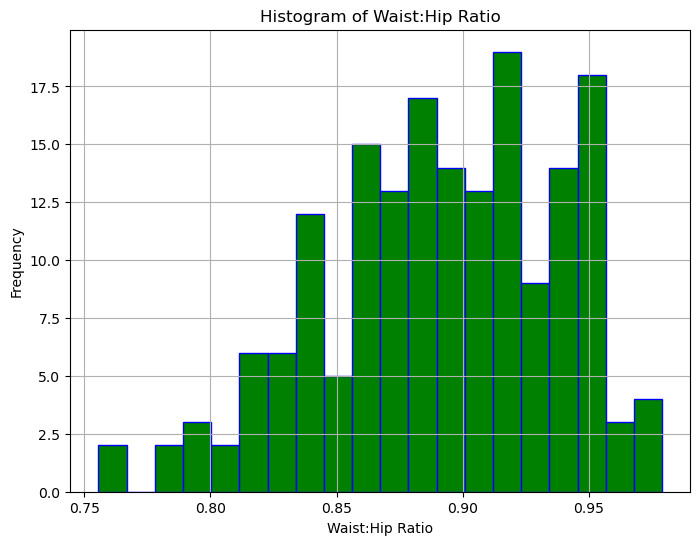

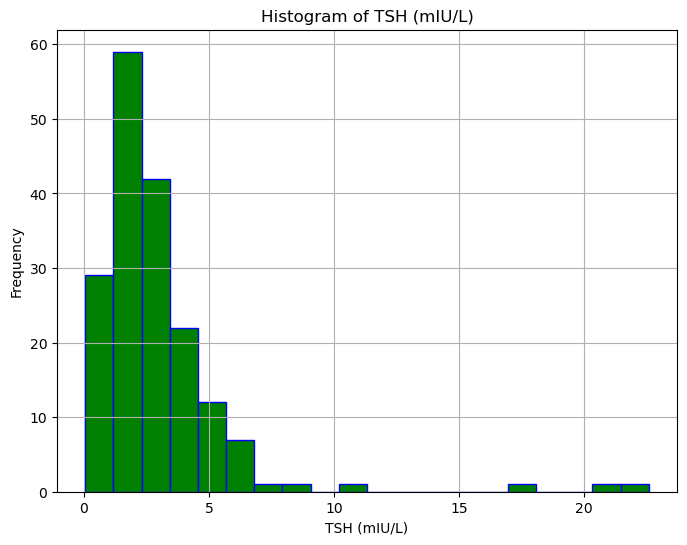

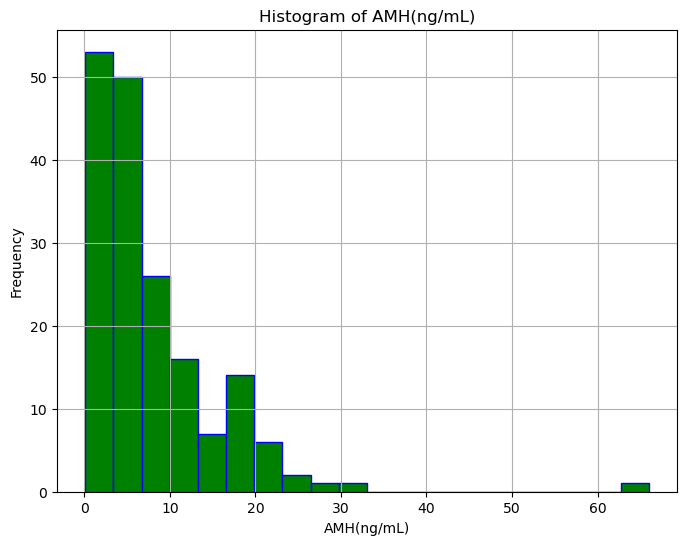

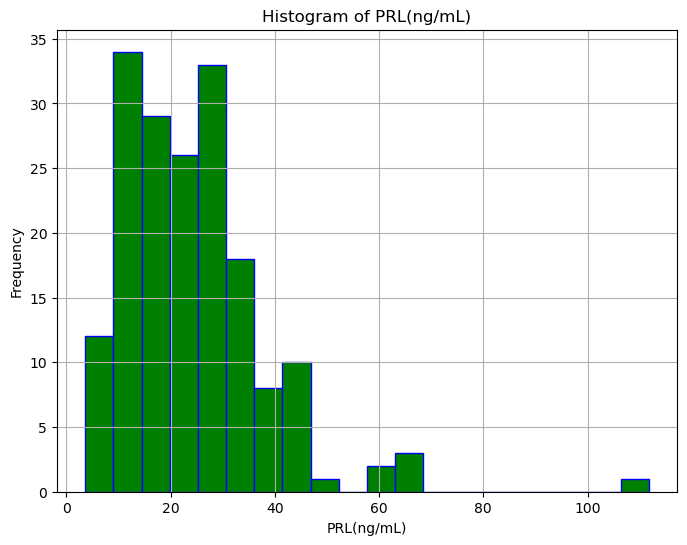

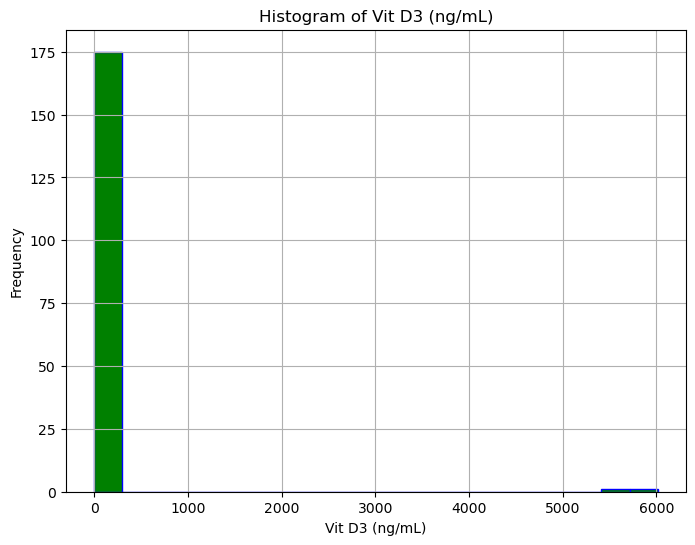

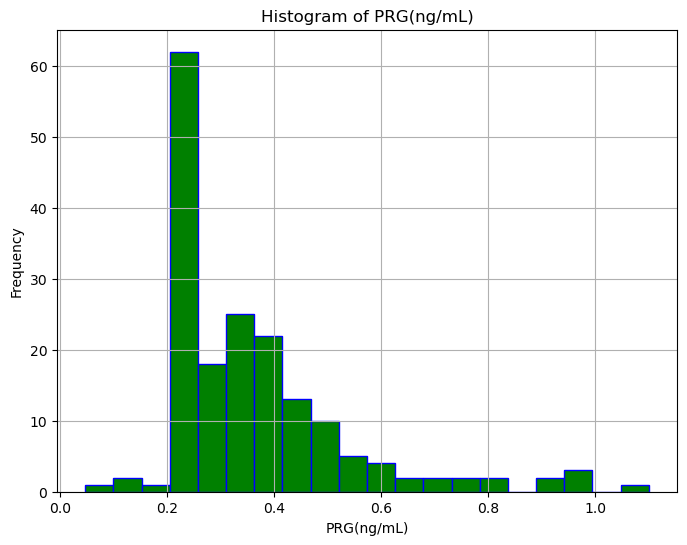

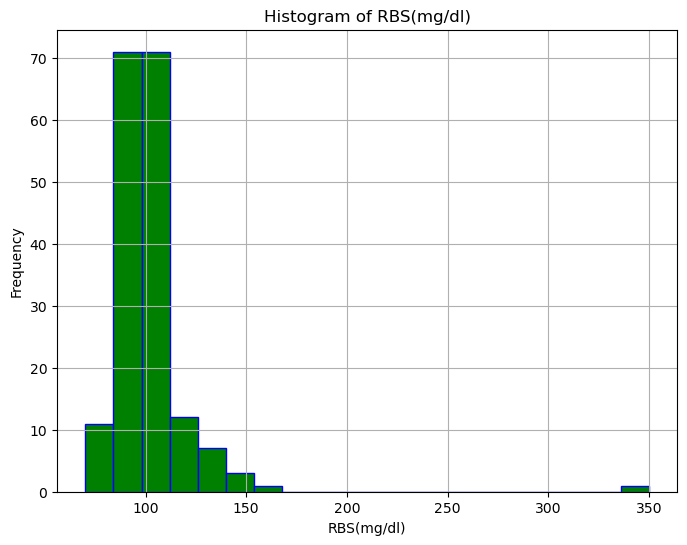

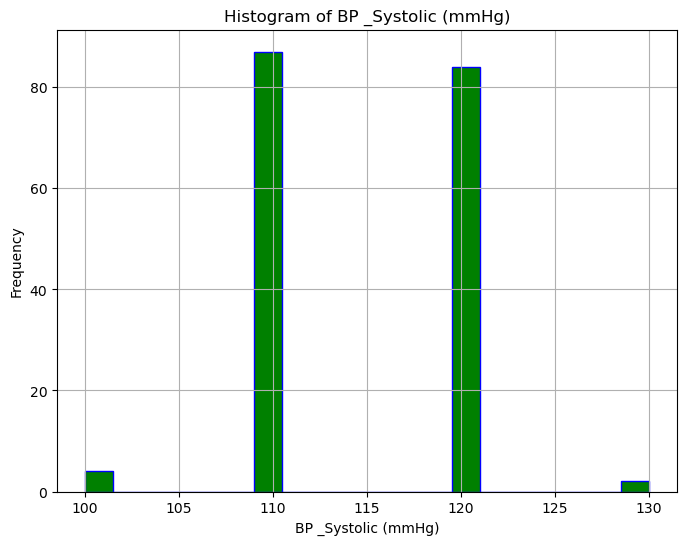

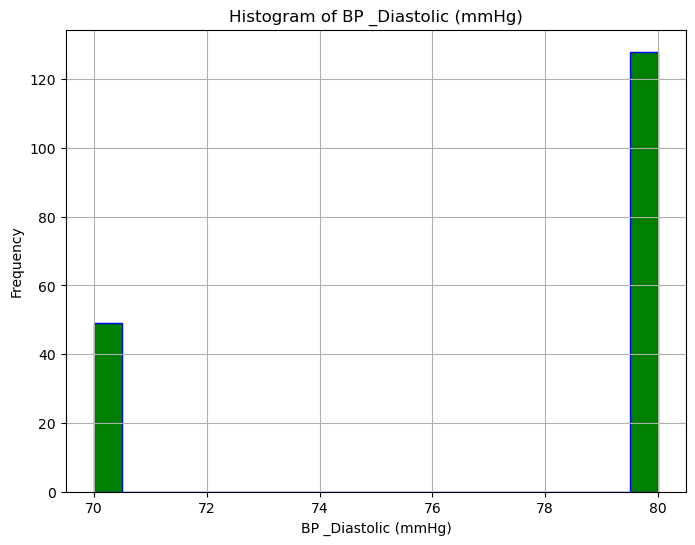

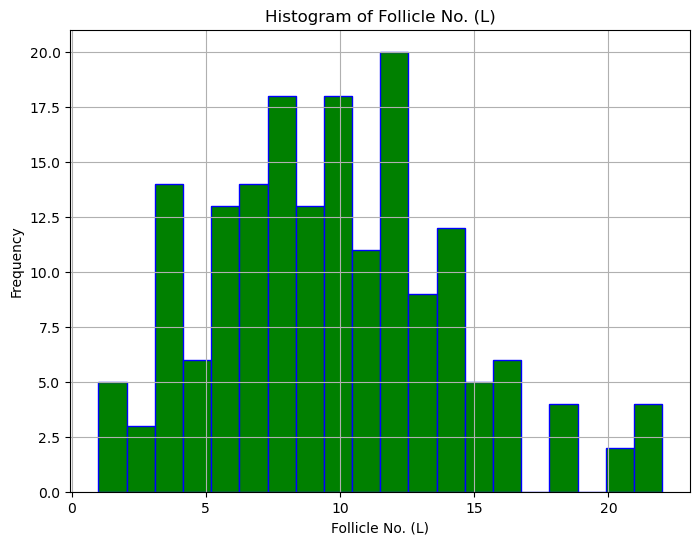

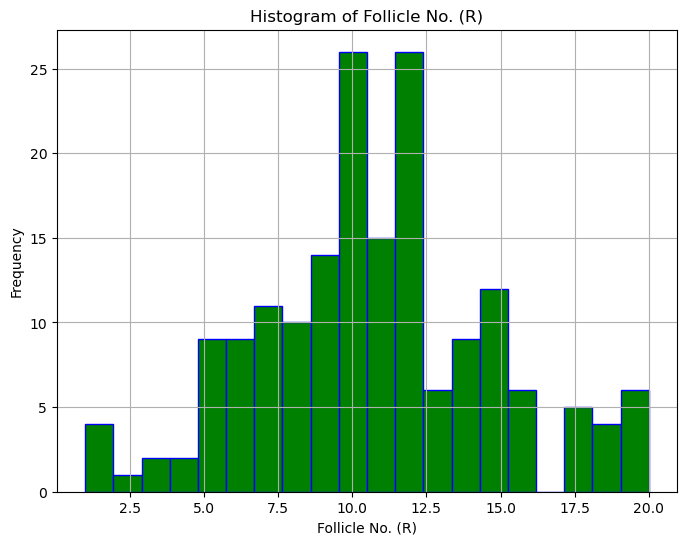

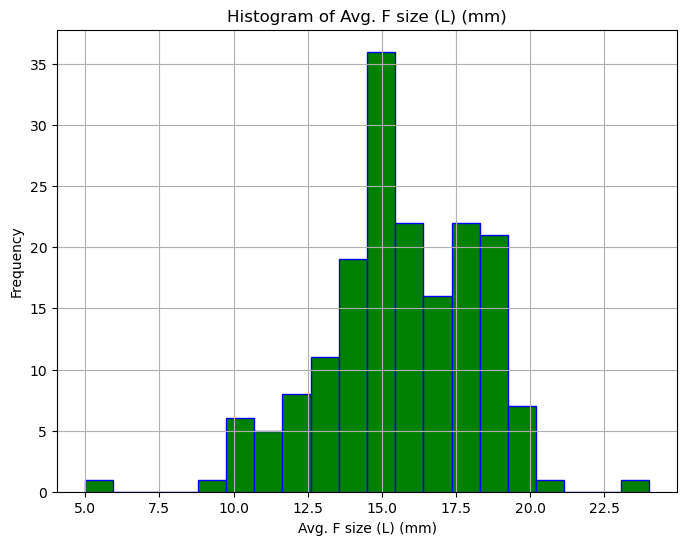

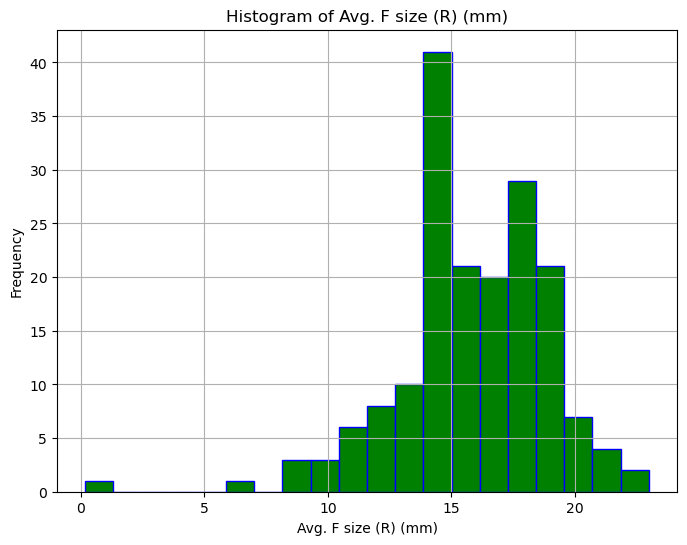

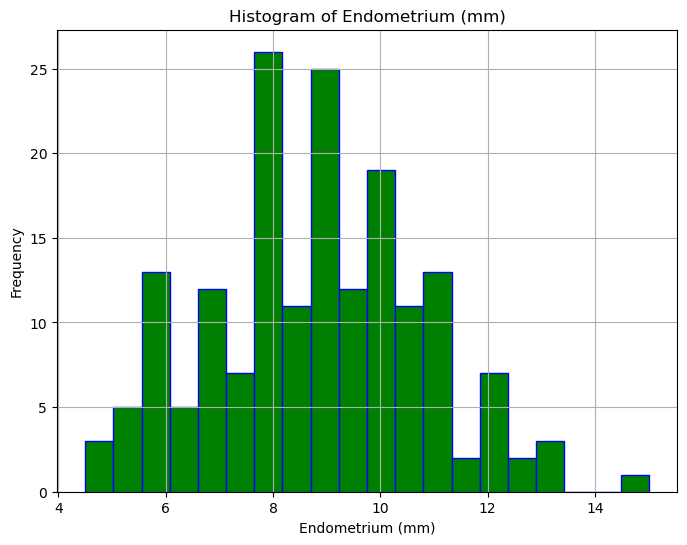

In [63]:
numerical_attributes = ['Weight (Kg)', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
df_pcos = df[df['PCOS (Y/N)']==1]
# Create histograms for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df_pcos[attribute], bins=20, color='green', edgecolor='blue')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [64]:
#feature selection
top_10_features = correlation_with_target[0:20]
print(top_10_features)
type(top_10_features)
a=pd.DataFrame(top_10_features)
a=a.T
b=a.columns
b=list(b)
b

PCOS (Y/N)               1.000000
Follicle No. (R)         0.648327
Follicle No. (L)         0.603346
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.376183
Pimples(Y/N)             0.286077
AMH(ng/mL)               0.264141
Weight (Kg)              0.211938
BMI                      0.200176
Cycle length(days)       0.178480
Hair loss(Y/N)           0.172879
Age (yrs)                0.168513
Waist(inch)              0.164598
Hip(inch)                0.162297
Avg. F size (L) (mm)     0.132992
Marraige Status (Yrs)    0.113056
Endometrium (mm)         0.106648
Name: PCOS (Y/N), dtype: float64


['PCOS (Y/N)',
 'Follicle No. (R)',
 'Follicle No. (L)',
 'Skin darkening (Y/N)',
 'hair growth(Y/N)',
 'Weight gain(Y/N)',
 'Cycle(R/I)',
 'Fast food (Y/N)',
 'Pimples(Y/N)',
 'AMH(ng/mL)',
 'Weight (Kg)',
 'BMI',
 'Cycle length(days)',
 'Hair loss(Y/N)',
 'Age (yrs)',
 'Waist(inch)',
 'Hip(inch)',
 'Avg. F size (L) (mm)',
 'Marraige Status (Yrs)',
 'Endometrium (mm)']

In [65]:
df_new=df[b]
df_new

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),BMI,Cycle length(days),Hair loss(Y/N),Age (yrs),Waist(inch),Hip(inch),Avg. F size (L) (mm),Marraige Status (Yrs),Endometrium (mm)
0,0,3,3,0,0,0,2,1.0,0,2.07,44.6,19.304017,5,0,28,30,36,18.0,7.0,8.5
1,0,5,3,0,0,0,2,0.0,0,1.53,65.0,24.921163,5,0,36,32,38,15.0,11.0,3.7
2,1,15,13,0,0,0,2,1.0,1,6.63,68.8,25.270891,5,1,33,36,40,18.0,10.0,10.0
3,0,2,2,0,0,0,2,0.0,0,1.22,65.0,29.674945,5,0,37,36,42,15.0,4.0,7.5
4,0,4,3,0,0,0,2,0.0,0,2.26,52.0,20.060954,5,1,25,30,37,16.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,0,1,0,0,0,2,0.0,0,1.70,50.0,18.456637,5,0,35,26,28,17.5,8.0,6.7
537,0,7,9,0,0,1,2,0.0,0,5.60,63.2,25.316456,5,0,30,32,34,19.0,4.0,8.2
538,0,0,1,0,0,0,2,0.0,0,3.70,54.0,23.372576,6,0,36,28,30,18.0,8.0,7.3
539,0,6,7,0,0,0,4,0.0,1,5.20,50.0,22.222222,2,0,27,26,28,18.0,2.0,11.5


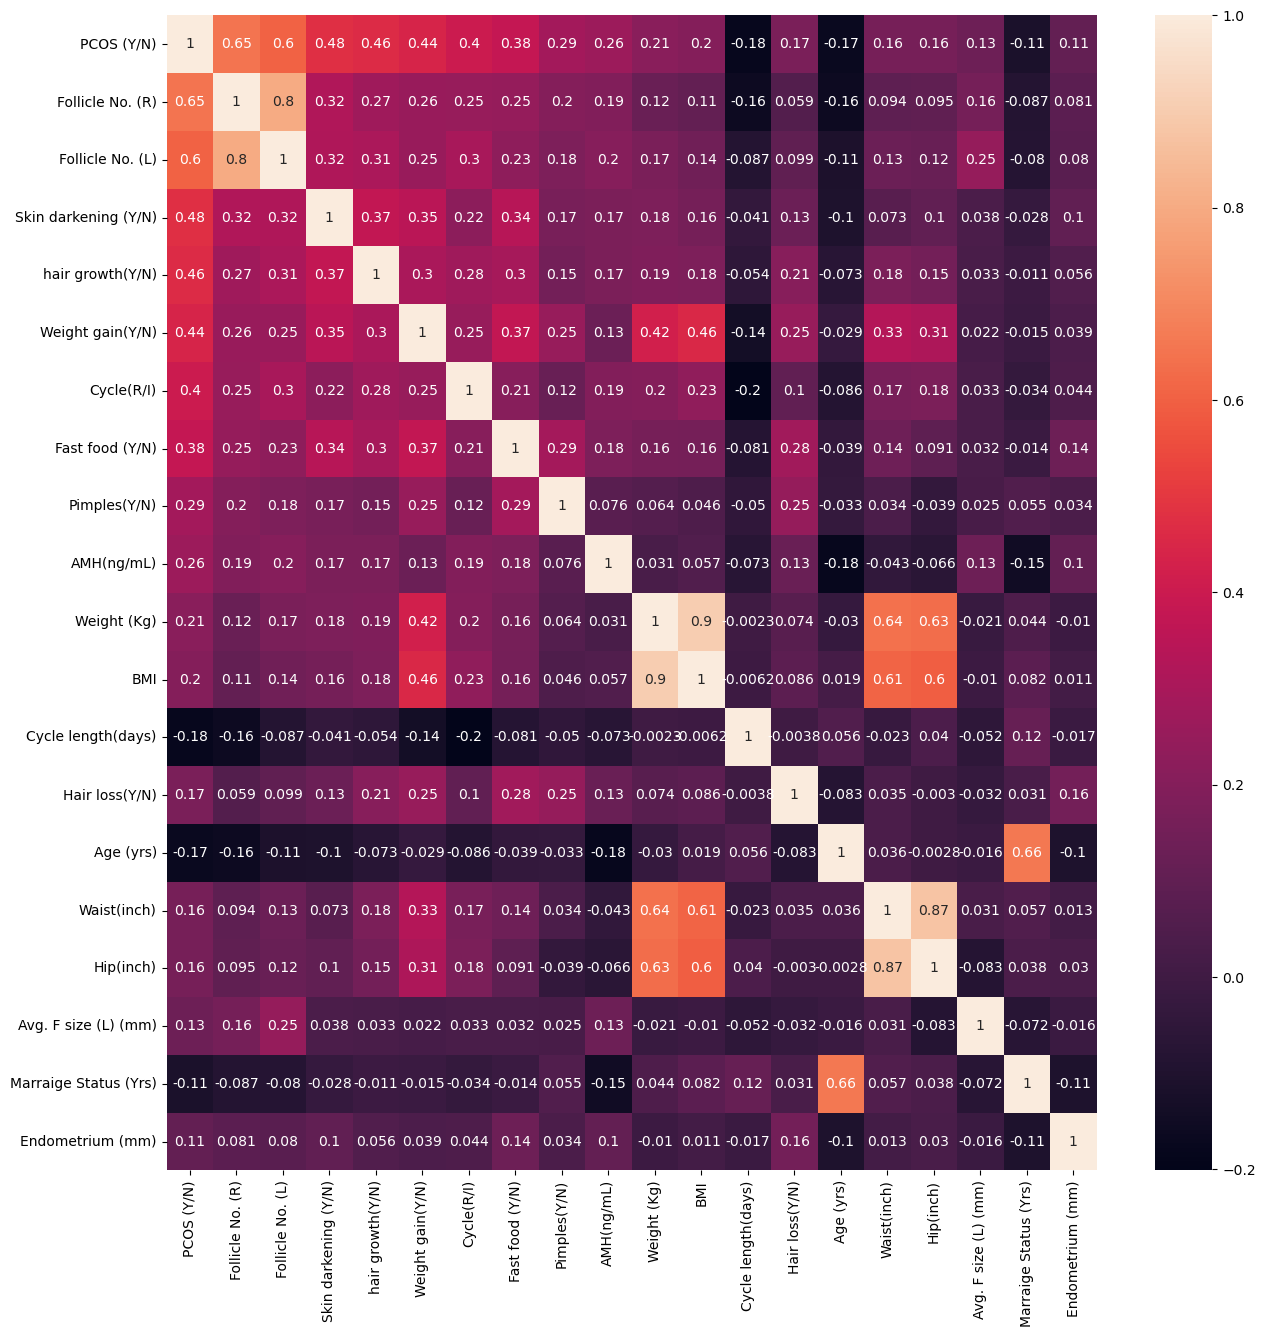

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [67]:
df_new['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [68]:
X = df_new.drop(['PCOS (Y/N)'],axis=1)
y = df_new['PCOS (Y/N)']

In [69]:
X.shape

(541, 19)

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
over_s = SMOTE()

In [72]:
X,y = over_s.fit_resample(X,y)

In [73]:
X.shape

(728, 19)

In [74]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
X_train.shape

(582, 19)

In [76]:
X_test.shape

(146, 19)

In [81]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred = logreg.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8972602739726028
Confusion Matrix:
[[63  8]
 [ 7 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        71
           1       0.89      0.91      0.90        75

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146



In [84]:
svc = svm.SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.79

The confusion Matrix is : 
 [[59 12]
 [19 56]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        71
           1       0.82      0.75      0.78        75

    accuracy                           0.79       146
   macro avg       0.79      0.79      0.79       146
weighted avg       0.79      0.79      0.79       146



In [85]:
gNB = GaussianNB()
gNB.fit(x1_train, y1_train)

y_pred = gNB.predict(x1_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(gNB.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of Naive Bayes classifier on test set: 0.88

The confusion Matrix is : 
 [[59 12]
 [10 65]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        71
           1       0.84      0.87      0.86        75

    accuracy                           0.85       146
   macro avg       0.85      0.85      0.85       146
weighted avg       0.85      0.85      0.85       146



In [86]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on test set: 0.92

The confusion Matrix is : 
 [[68  3]
 [ 9 66]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        71
           1       0.96      0.88      0.92        75

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146



In [87]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_ = accuracy_score(y_test, y_pred)
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy_)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of K-nearest Neighbor classifier on test set: 0.815068493150685

The confusion Matrix is : 
 [[56 15]
 [12 63]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        71
           1       0.81      0.84      0.82        75

    accuracy                           0.82       146
   macro avg       0.82      0.81      0.81       146
weighted avg       0.82      0.82      0.81       146



In [88]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on test set: 0.85

The confusion Matrix is : 
 [[60 11]
 [11 64]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        71
           1       0.85      0.85      0.85        75

    accuracy                           0.85       146
   macro avg       0.85      0.85      0.85       146
weighted avg       0.85      0.85      0.85       146



In [89]:
print("Accuracy of Logistic Regression on test set:", accuracy)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(gNB.score(X_test, y_test)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy_)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))

Accuracy of Logistic Regression on test set: 0.8972602739726028
Accuracy of SVM classifier on test set: 0.79
Accuracy of Naive Bayes classifier on test set: 0.88
Accuracy of Random Forest classifier on test set: 0.92
Accuracy of K-nearest Neighbor classifier on test set: 0.815068493150685
Accuracy of Decision Tree classifier on test set: 0.85


In [90]:
#this needs improvement 
Test=[[7,9,1,1,1,2,1,1,4.10,104]]
Output=clf3.predict(Test)
for x in Output:
    if x==1 :
        print('You may have PCOS')
        exit
    else : 
        print("You doesn't have PCOS ")

NameError: name 'clf3' is not defined